# EDF Bill Playbook

<p>
Mal Minhas, v0.1<br>
16.11.24
</p>
<p>
<h4>Versions</h4>
<ul>
<li><b>v0.1</b>: 16.11.24. First version</li>
</ul>
</p>

You can download your EDF data from the Energy Hub as a csv that dates back to the beginning of that year from the point of download.  Here's a quick analysis of one I downloaded:

In [1]:
import pandas as pd

file = 'combined-consumption-2024-01-01-2024-12-31.csv'
df = pd.read_csv(file)
# Convert Timestamp to a datetime object to allow sorting
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%Y')  
# Sort the data by Timestamp to ensure the graph is chronological
df = df.sort_values('Timestamp')
df

,Timestamp,Electricity consumption (kWh),Electricity cost (£),Gas consumption (kWh),Gas cost (£)
0,2024-01-01,487.256,164.93,4533.8540,370.55
1,2024-02-01,212.825,79.76,3527.4642,289.75
2,2024-03-01,251.695,92.71,2912.3378,241.32
3,2024-04-01,185.382,71.85,2111.2856,177.16
4,2024-05-01,218.889,82.12,497.2087,48.51
5,2024-06-01,147.198,60.14,197.9208,24.66
6,2024-07-01,159.874,64.02,183.7379,23.52
7,2024-08-01,38.788,27.39,135.1189,19.95
8,2024-09-01,37.270,26.42,797.3719,72.43
9,2024-10-01,86.891,41.62,1770.8291,150.01


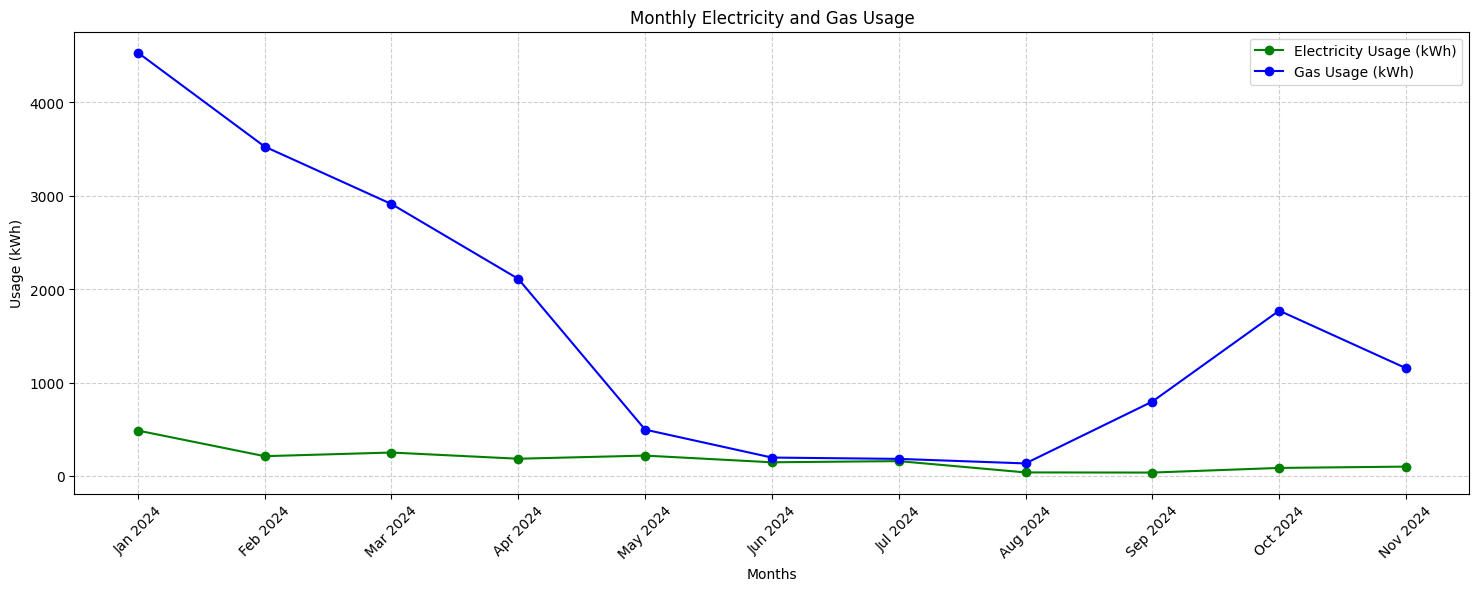

In [2]:
import matplotlib.pyplot as plt

def plot_consumption(df):
    """
    Plots electricity and gas consumption month by month.

    Args:
        df (pd.DataFrame): DataFrame containing columns for Timestamp, Electricity consumption, and Gas consumption.
    """
    # Extract data for plotting
    months = df['Timestamp'].dt.strftime('%b %Y')  # Format for display (e.g., "Jan 2024")
    electricity = df['Electricity consumption (kWh)']
    gas = df['Gas consumption (kWh)']
    
    if len(months) != len(electricity) or len(months) != len(gas):
        raise ValueError("All input lists must have the same length.")
    
    # Create a DataFrame from the data
    edf = pd.DataFrame({
        'Months': months,
        'Electricity Usage (kWh)': electricity,
        'Gas Usage (kWh)': gas
    })
    edf.set_index('Months', inplace=True)
    
    # Plot using DataFrame's plot method
    ax = edf.plot(kind='line', figsize=(18, 6), color=['g','b'], marker='o', title='Monthly Electricity and Gas Usage', rot=45)
    ax.set_xlabel('Months')
    ax.set_ylabel('Usage (kWh)')

    # Set x-axis ticks and enable gridlines
    ax.set_xticks(range(len(months)))  # One tick per month
    ax.set_xticklabels(months)         # Use month names for the ticks
    ax.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines aligned with x-axis ticks
    ax.grid(axis='y', linestyle='--', alpha=0.6)  # Gridlines for y-axis
    
plot_consumption(df)

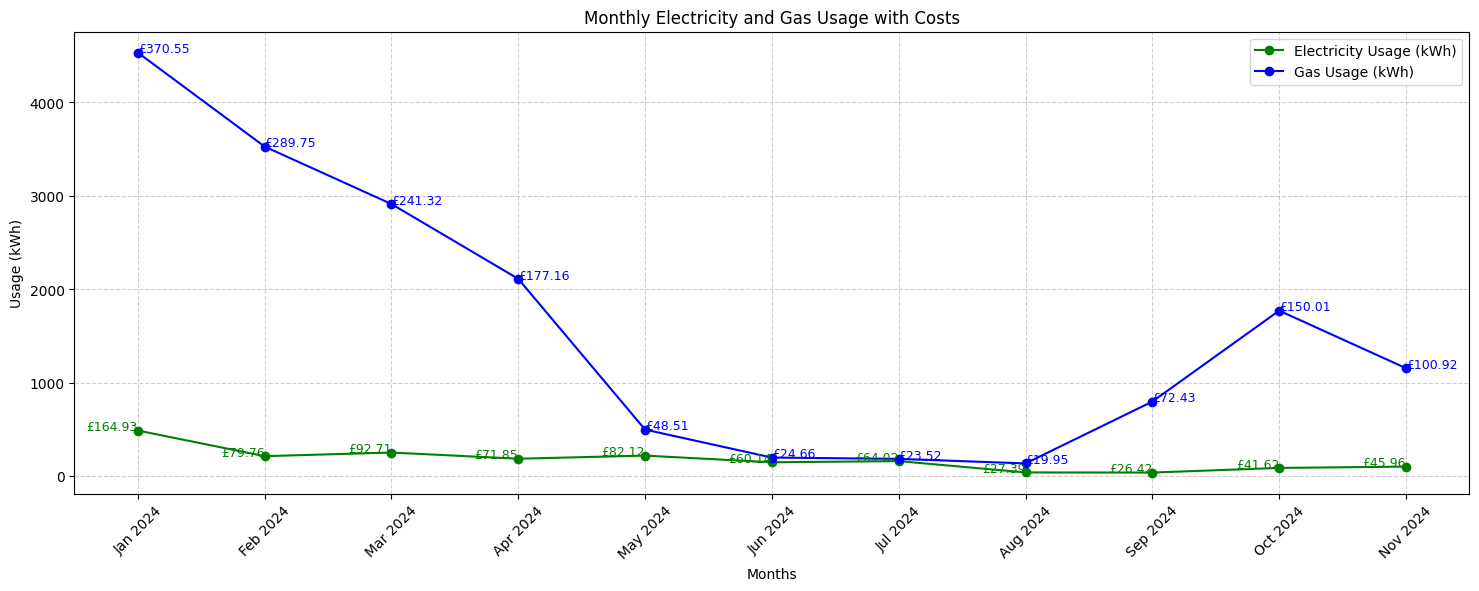

In [3]:
def plot_consumption_with_prices(df):
    """
    Plots electricity and gas consumption month by month with price annotations.

    Args:
        df (pd.DataFrame): DataFrame containing columns for Timestamp, Electricity consumption, Gas consumption,
                           Electricity cost, and Gas cost.
    """
    # Extract data for plotting
    months = df['Timestamp'].dt.strftime('%b %Y')  # Format for display (e.g., "Jan 2024")
    electricity = df['Electricity consumption (kWh)']
    gas = df['Gas consumption (kWh)']
    electricity_cost = df['Electricity cost (£)']
    gas_cost = df['Gas cost (£)']

    if len(months) != len(electricity) or len(months) != len(gas):
        raise ValueError("All input lists must have the same length.")
    
    # Create a DataFrame from the data
    edf = pd.DataFrame({
        'Months': months,
        'Electricity Usage (kWh)': electricity,
        'Gas Usage (kWh)': gas
    })
    edf.set_index('Months', inplace=True)

    # Plot using DataFrame's plot method
    ax = edf.plot(kind='line', figsize=(18, 6), color=['g','b'], marker='o', title='Monthly Electricity and Gas Usage with Costs', rot=45)
    ax.set_xlabel('Months')
    ax.set_ylabel('Usage (kWh)')

    # Set x-axis ticks and enable gridlines
    ax.set_xticks(range(len(months)))  # One tick per month
    ax.set_xticklabels(months)         # Use month names for the ticks
    ax.grid(axis='x', linestyle='--', alpha=0.6)  # Gridlines aligned with x-axis ticks
    ax.grid(axis='y', linestyle='--', alpha=0.6)  # Gridlines for y-axis
    
    # Add annotations for prices
    for i, (x, elec, gas, elec_cost, gas_cost) in enumerate(zip(months, electricity, gas, electricity_cost, gas_cost)):
        plt.text(i, elec, f"£{elec_cost:.2f}", fontsize=9, ha='right', color='g')
        plt.text(i, gas, f"£{gas_cost:.2f}", fontsize=9, ha='left', color='b')
    
plot_consumption_with_prices(df)

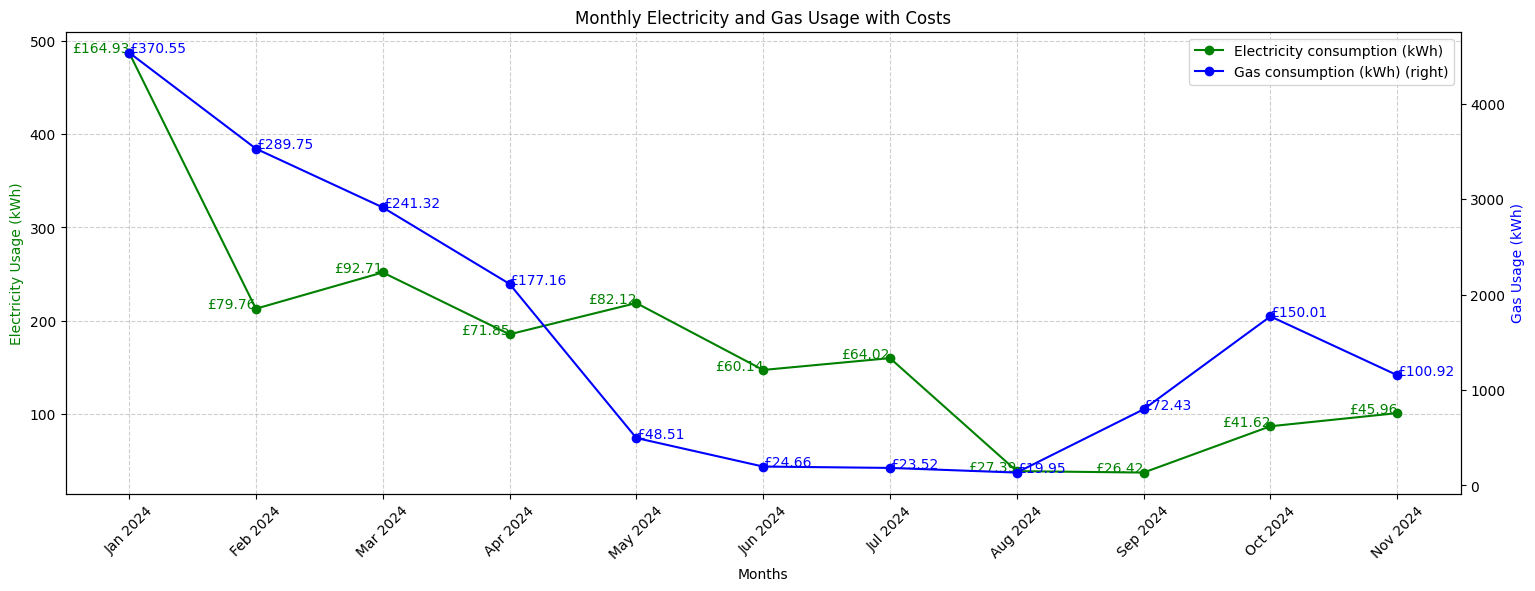

In [4]:
def plot_consumption_with_prices_dfplot(df):
    """
    Plots electricity and gas consumption month by month with price annotations using DataFrame's plot method.
    Includes dual y-axes for electricity and gas.
    
    Args:
        df (pd.DataFrame): DataFrame containing columns for Timestamp, Electricity consumption, Gas consumption,
                           Electricity cost, and Gas cost.
    """
    edf = (df)
    
    # Extract data for plotting
    edf['Month'] = edf['Timestamp'].dt.strftime('%b %Y')  # Add a formatted month column for display
    edf.set_index('Month', inplace=True)  # Set month as the index for plotting
    
    # Create the plot with dual y-axes
    ax = edf[['Electricity consumption (kWh)', 'Gas consumption (kWh)']].plot(
        kind='line', figsize=(18, 6), color=['g','b'], marker='o', secondary_y='Gas consumption (kWh)', title='Monthly Electricity and Gas Usage with Costs'
    )
    
    # Customize the axes
    ax.set_xlabel('Months')
    ax.set_ylabel('Electricity Usage (kWh)', color='g')
    ax.right_ax.set_ylabel('Gas Usage (kWh)', color='b')  # Secondary y-axis customization
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_xticks(range(len(df)))  # Align ticks with months
    ax.set_xticklabels(df.index, rotation=45)  # Use formatted month names

    # Annotate prices on the respective lines
    zipped = zip(edf['Electricity consumption (kWh)'], edf['Gas consumption (kWh)'], edf['Electricity cost (£)'], edf['Gas cost (£)'])
    for i, (elec, gas, elec_cost, gas_cost) in enumerate(zipped):
        ax.text(i, elec, f"£{elec_cost:.2f}", fontsize=10, ha='right', color='g')
        ax.right_ax.text(i, gas, f"£{gas_cost:.2f}", fontsize=10, ha='left', color='b')

plot_consumption_with_prices_dfplot(df)